In [141]:
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter
from skimage import data, io, filters
from skimage import feature as ft
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from collections import Counter


### 1.Reading images

In [142]:
dataset_path = "F:\\NUS SOC Summer Workshop\\Project 1_ Traffic Sign Recogniti\\Dataset_1\\images"

X = []
y = []
for i in glob.glob(dataset_path + '\\*.png', recursive=True):
    
    label = i.split("images")[1][1:4]
    y.append(label)
    # write code to read ecah file i, and append it to list X
    X.append(cv2.imread(i))


# you should have X, y with 5998 entries on each.
print(len(y))
print(len(X))

5998
5998


### 2.Pre-processing images

#### equalize to make the samples distribute more uniformly

In [143]:
# 统计每种标志的个数，并记录在valuelist中
for i in y:
     #List.count(i)统计列表元素对应的个数
    if y.count(i) > 0:
        counter[i] = y.count(i)
valuelist=[]
for key, value in counter.items():
    valuelist.append(value)
print(np.mean(valuelist))
print(np.median(valuelist))

# 切片
sliceList_X=[]
sliceList_y=[]
start=0
for i in range (0,len(valuelist)):
    sliceList_y.append(y[start:start+valuelist[i]])
    sliceList_X.append(X[start:start+valuelist[i]])
    start=start+valuelist[i]

# 补齐至62项(中位数)
for i in range (0,len(valuelist)):
    if valuelist[i]<62:
        n=62-valuelist[i]
        for j in range(0,n):
            sliceList_y[i].append(sliceList_y[i][0])
            sliceList_X[i].append(sliceList_X[i][0])

# 合并
y=[]
X=[]
for i in range (0,len(valuelist)):
    y.extend(sliceList_y[i])
    X.extend(sliceList_X[i])

print(len(X))
print(len(y))

103.41379310344827
62.0
7012
7012


#### resize48by48 & grayscale & equlizeHistogram

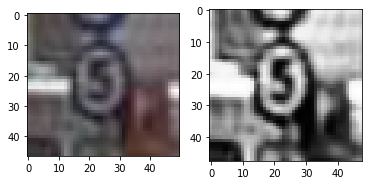

In [147]:
X_processed=[]
for x in X:
    # Write code to resize image x to 48x48 and store in temp_x
    temp_x = cv2.resize(x, (48, 48))
    # Write code to convert temp_x to grayscale
    temp_x = cv2.cvtColor(temp_x, cv2.COLOR_BGR2GRAY)
    # equalize histogram
    temp_x = cv2.equalizeHist(temp_x)
    # Append the converted image into X_processed
    X_processed.append(temp_x)
    
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(X[1])
fig.add_subplot(1, 2, 2)
plt.imshow(X_processed[1],cmap='gray')

### 3.Calculating Features

In [148]:
X_features = []
for x in X_processed:
    x_feature = ft.hog(x, orientations=8, pixels_per_cell=(10, 10),cells_per_block=(1, 1), visualize=False, multichannel=False)
    X_features.append(x_feature)

### 4.Training and testing the classifier

In [149]:
# repeat experiment several times
for i in range (0,10):
    # write code to Split training & testing sets using sklearn.model_selection.train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size = 0.2)
    
    #SVM
    accuracy_SVM=[]
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    accuracy_SVM.append(clf.score(X_test, y_test))
    
    #RandomForest classifier
    accuracy_rfclf=[]
    rfclf = RandomForestClassifier()
    rfclf.fit(X_train, y_train)
    accuracy_rfclf.append(rfclf.score(X_test, y_test))
    
    #Gaussian Naive Bayes
    accuracy_gnbclf=[]
    gnbclf = GaussianNB()
    gnbclf.fit(X_train, y_train)
    accuracy_gnbclf.append(gnbclf.score(X_test, y_test))
    
    #k-Nearest Neighbours classifier (k=1)
    accuracy_kneighclf=[]
    kneighclf = KNeighborsClassifier(n_neighbors=1)
    kneighclf.fit(X_train, y_train)
    accuracy_kneighclf.append(kneighclf.score(X_test, y_test))

print('SVM:',np.mean(accuracy_SVM))
print('RandomForest:',np.mean(accuracy_rfclf))
print('Gaussian Naive Bayes:',np.mean(accuracy_gnbclf))
print('k-Nearest Neighbours:',np.mean(accuracy_kneighclf))

SVM: 0.9543834640057021
RandomForest: 0.9686386315039202
Gaussian Naive Bayes: 0.8082679971489665
k-Nearest Neighbours: 0.970064148253742
